# Starting out with some fun!

## Talking Machines: The Power of Machine Learning

Before talking about the class, *let's just do some cool shit*!

The following lines of code leverage the recent trend of **Generative AI**, and in particular **Diffusion Models**, in order to generate images from users' natural language.

---

**CAUTION** you do *not* have to understand the following code. Do not fret!

In [ ]:
! pip install --upgrade transformers diffusers[torch]

# after running this cell, restart your runtime!

In [3]:
# This is a code comment! I will mark code in class with comments so you can follow along

"""
Sometimes comments run long, like the comment above. In such cases, it can be
easier to triple quote your code such that it can flow in multiple lines. Like
this one!
"""

# here we are importing `packages` we'll learn more about these later...
from diffusers import DiffusionPipeline, AutoencoderKL
from PIL import Image
import torch  # torch is short for "pytorch", a popular deep learning library


# here we're importing a diffusion model to create images, as suggested earlier.
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# using cpu gonna be slowwww. Most deep learning models use "GPUs"!
generator = torch.Generator("cpu").manual_seed(142214)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


The output above is called a "log". It tells us information, warnings, or even errors about our code. You can safely ignore that log for now.

  0%|          | 0/5 [00:00<?, ?it/s]

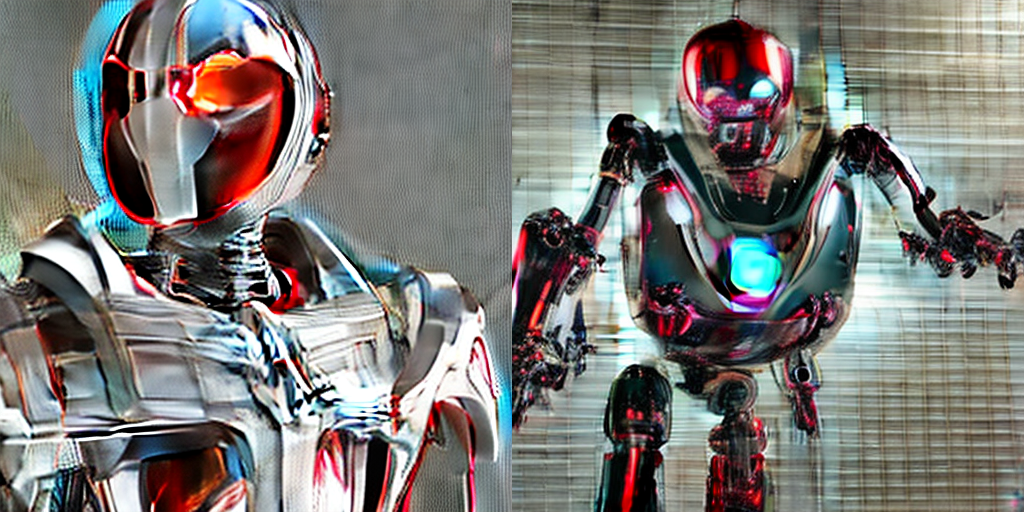

In [6]:
# this is our prompt. We are literally telling our diffusion model what to make
prompt = """beautiful, 4k image of an evil robot with glowing red eyes staring
            in profile. The robot is made of metal. It will destory you.
            """

# this is a function. Functions start with def. They take arguments.
# you can safely ignore the details of this function.
# It will make your brain explode.
# AVERT YOUR EYES.
def get_inputs(g_generator: torch.Generator, batch_size: int = 1, ):
    """
    This is a function used to organize the parameters we want for our model
    pipeline. And this is a doc-string. It is used in function to tell software
    engineers what the heck they're looking at.
    """
    generator = [g_generator for i in range(batch_size)]
    prompts = batch_size * [prompt]
    num_inference_steps = 5

    return {"prompt": prompts,
            "generator": generator,
            "num_inference_steps": num_inference_steps}



# this here, it's another function.
def image_grid(imgs, rows: int = 2, cols:int = 2):
    """
    This function is meant to take the images for our model and place them in
    a grid. It's a wholly aesthetic function. Feel free to ignore.
    """
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

# gross code to gross you out. feel free to ignore
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
pipeline.vae = vae

# Functions aren't used unless they're called. So we call them in the code below
images = pipeline(**get_inputs(batch_size=2, g_generator=generator)).images
image_grid(images, rows=1, cols=2)

And there you have it! The code below generate wholly orginal* images of scary machines derived statistical processes called diffusion models.

* original is a bit of a misnomer. Fragments of generated images can often be traced back to the training data used in the diffusion model.

**Okay, so what is Generative AI?**

Let's ask the product of Generative AI itself, [ChatGPT](https://openai.com/blog/chatgpt), to define it for us. And, because we're good ... Chapmanites(?) we'll also get it to cite itself. 😇

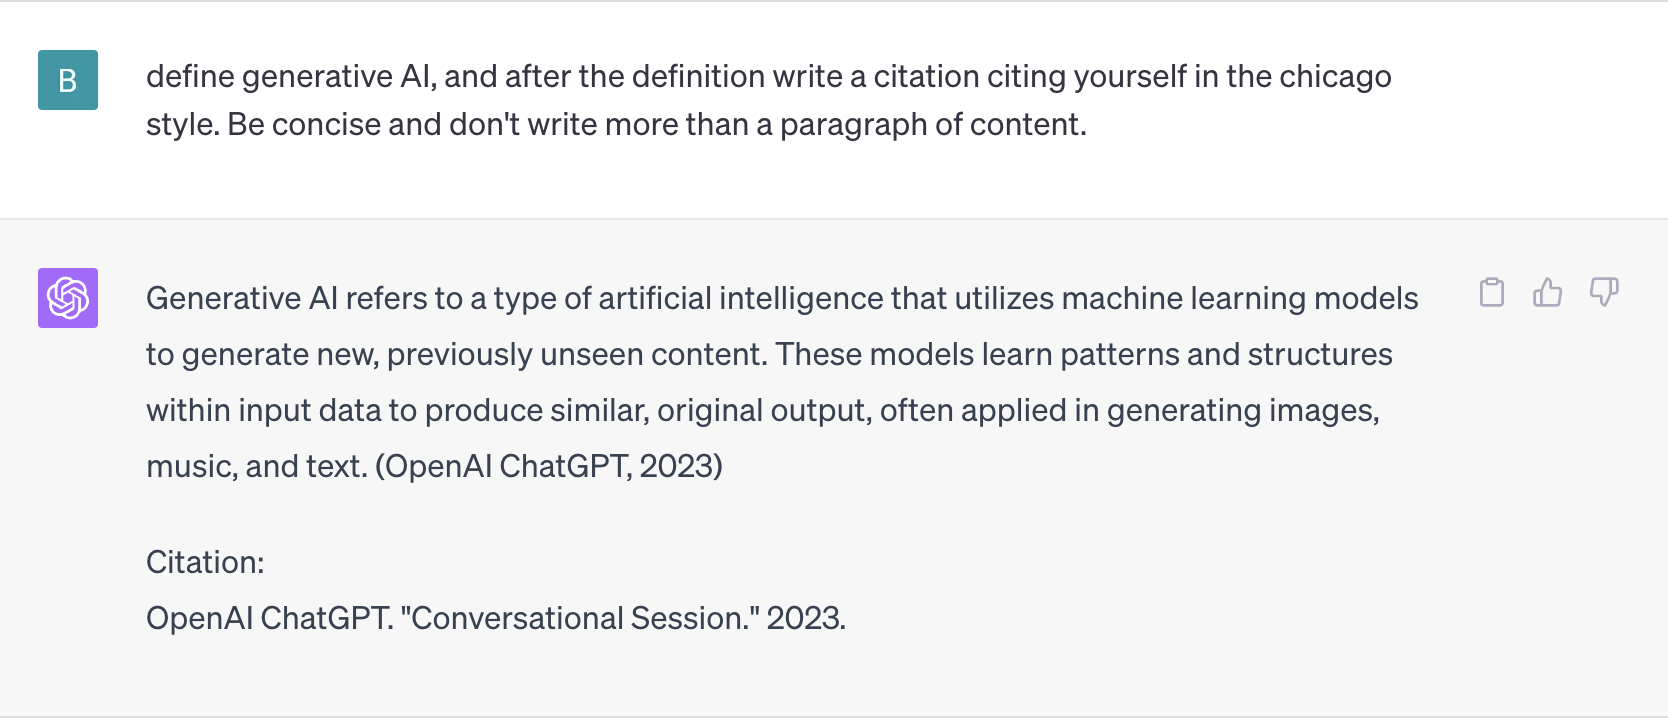

## Using Notebooks

**Where are we anyway? What is this thing we're using?**

The thing we're using is called a notebook. We will use notebooks, and in particular, "Google Colab" notebooks extensively throughout this course.

**What is a notebook?**

In the context of programming, and Python in particular, a notebook is an Interactive Development Environment (IDE), in which users can display output natively into discrete "cells" rather than to their "terminal" environment or into popup screens.

The images below is contained within a cell. So is the text you're reading now.

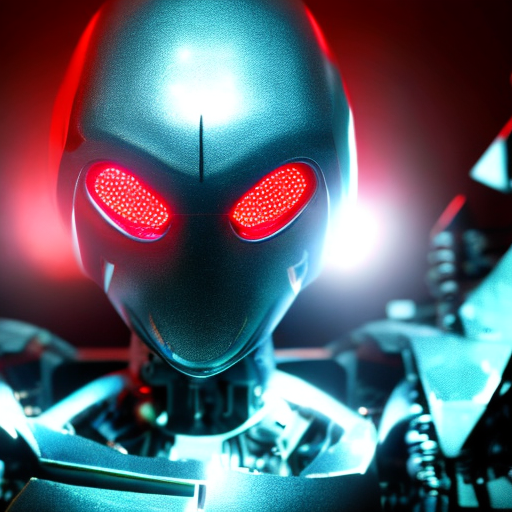

In [ ]:
# This is a cell!
images[0]

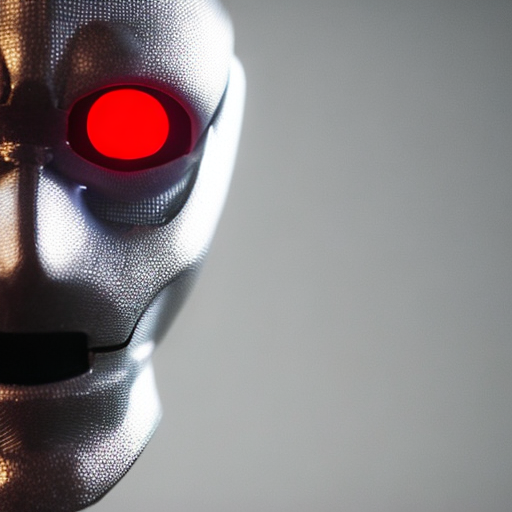

In [ ]:
# This is *also* a cell!
images[1]

## Why are we talking about all this?

We are talking about this because I want to show you that nowadays, in only a few lines of code, *you can literally blow the minds, not only of our ancestors, but of the world's most expert software engineers two years ago*.

Data science and machine learning is continually overcoming obstacles once perceived as impossible.

**In this class, you can start on the journey to engage with this revolution.**

But first, let's get back to the slides...

# Getting Started With Google Colab

## Login!

- You'll need a google email account. To create one you can go [here](https://accounts.google.com/signup/v2/createaccount?flowName=GlifWebSignIn&flowEntry=SignUp).
- Then you'll need to log into Google Colab: [colab.research.google.com](colab.research.google.com).



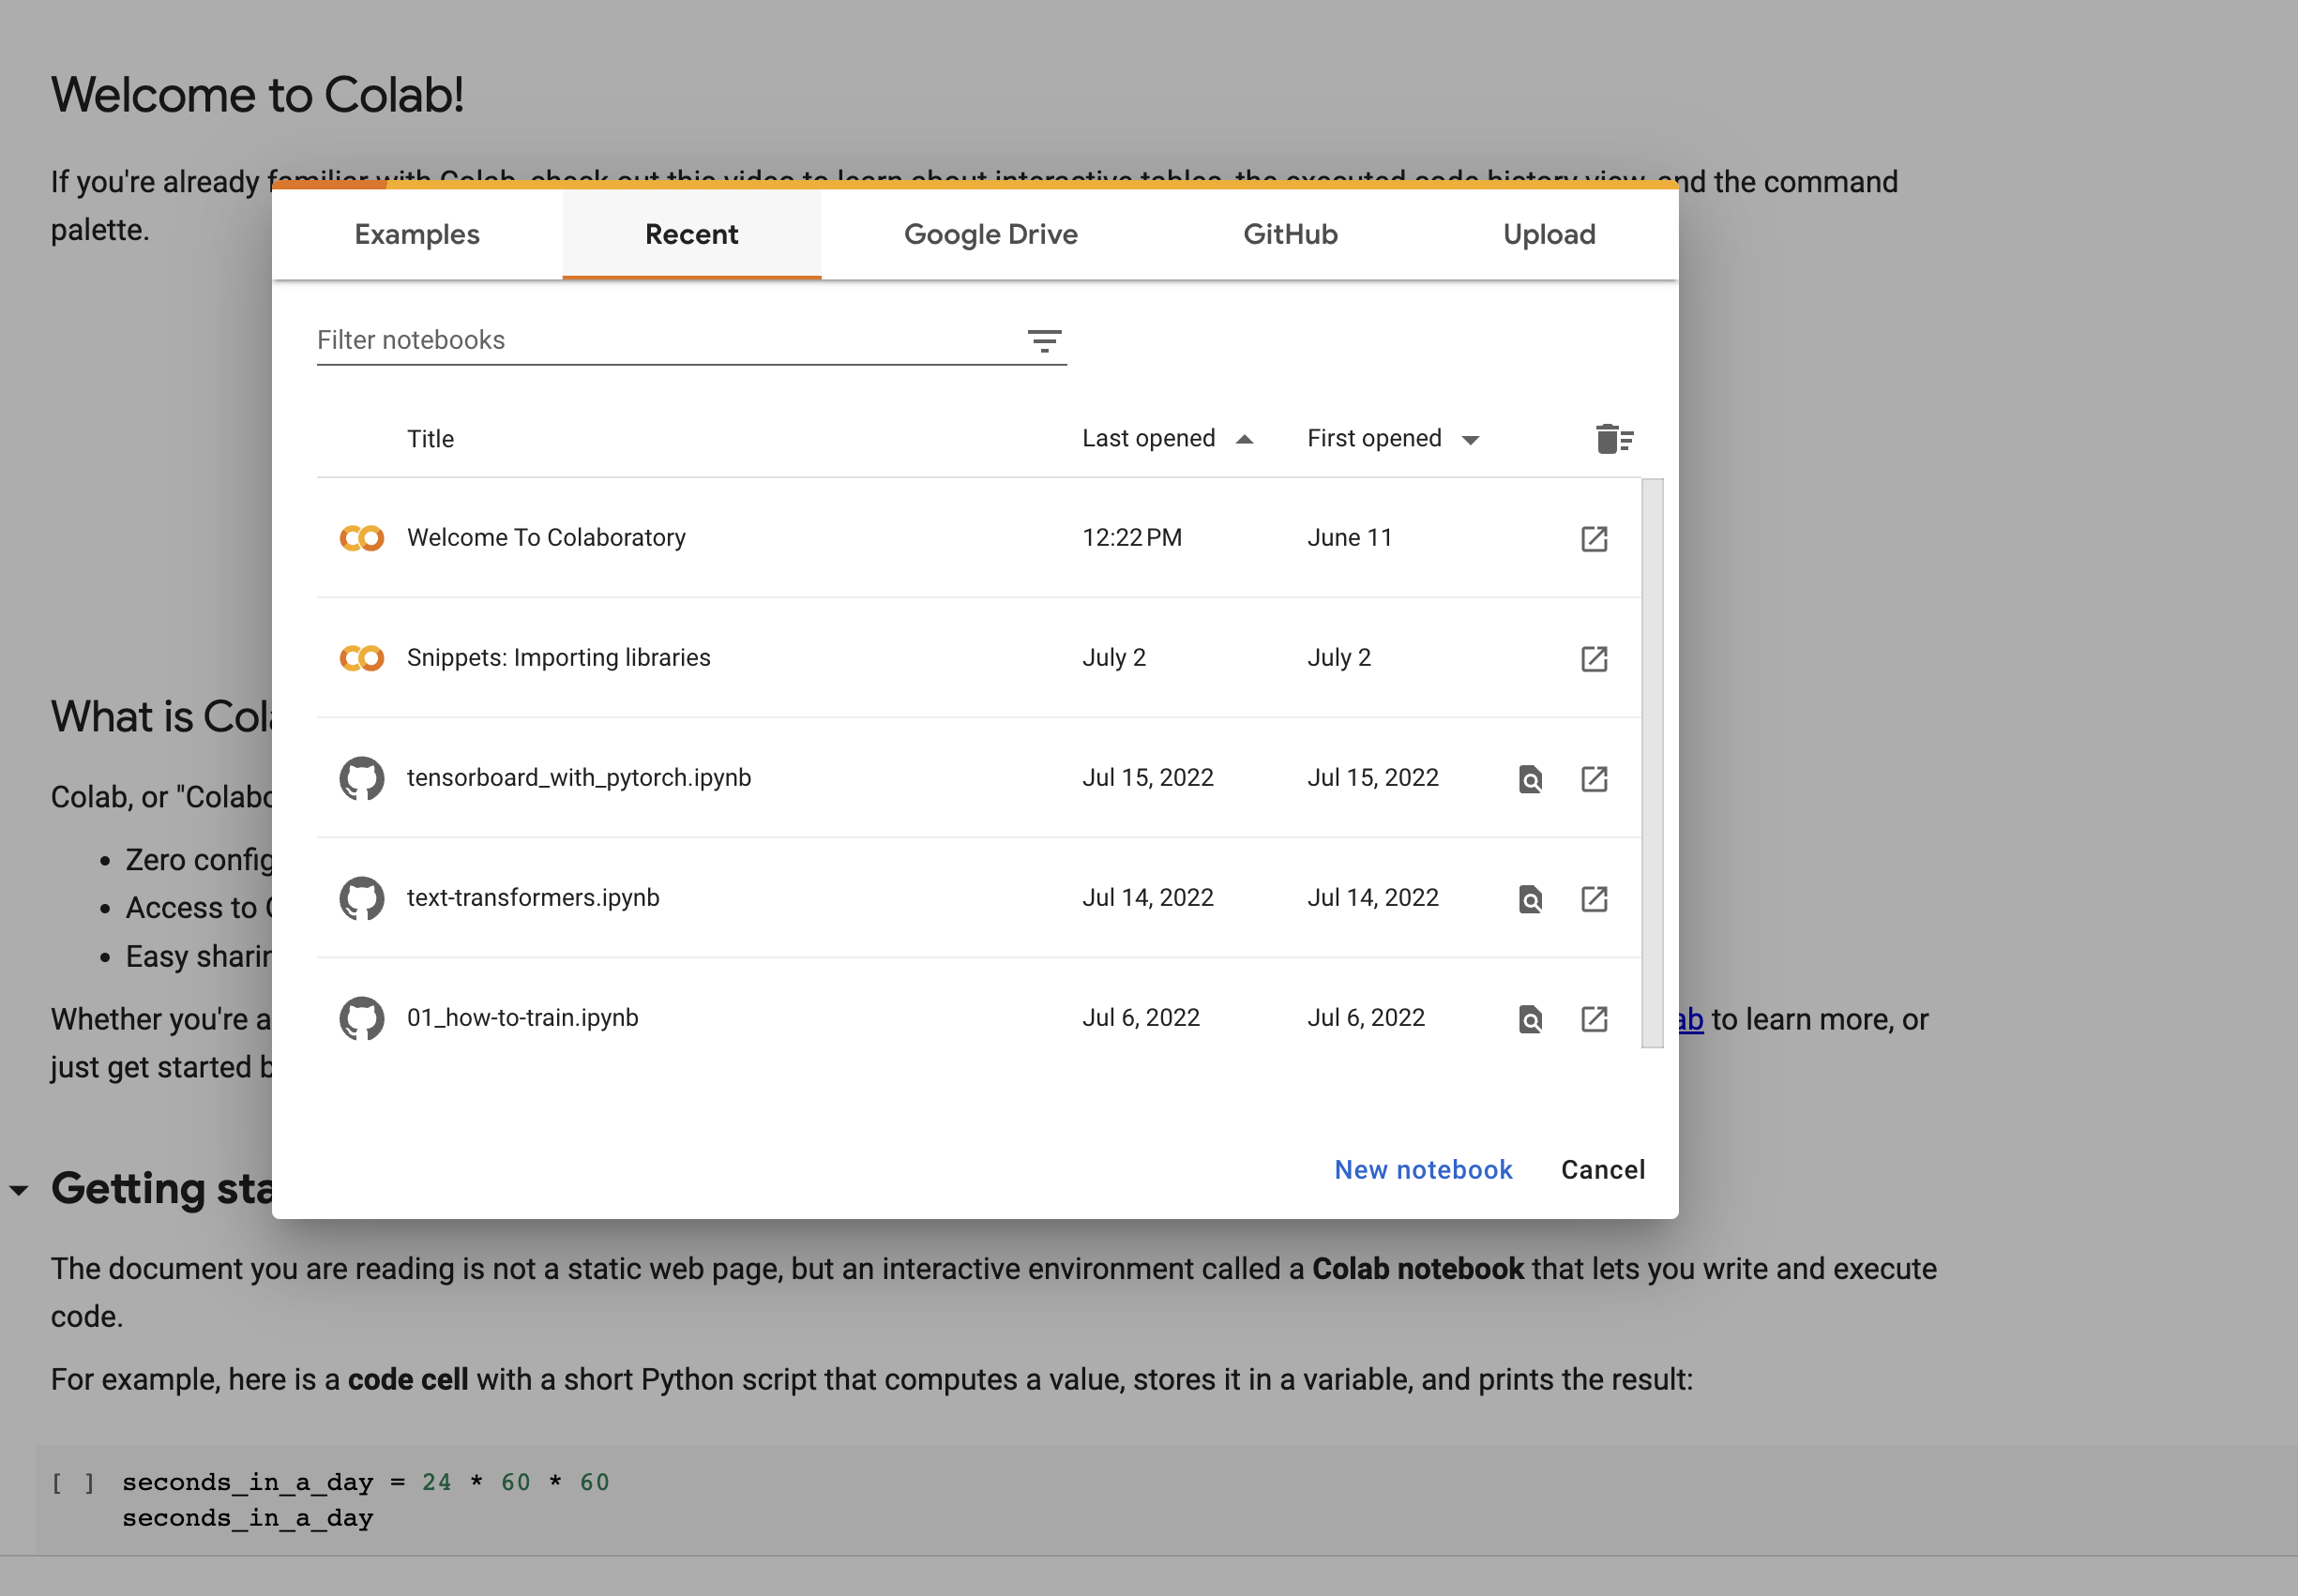

## Hey let's create a QR code!

In [ ]:
! pip install "qrcode[pil]" # to install a dependency (a package or library) you write pip install ____

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


**After you install your a package with pip, you must *restart your runtime*!**

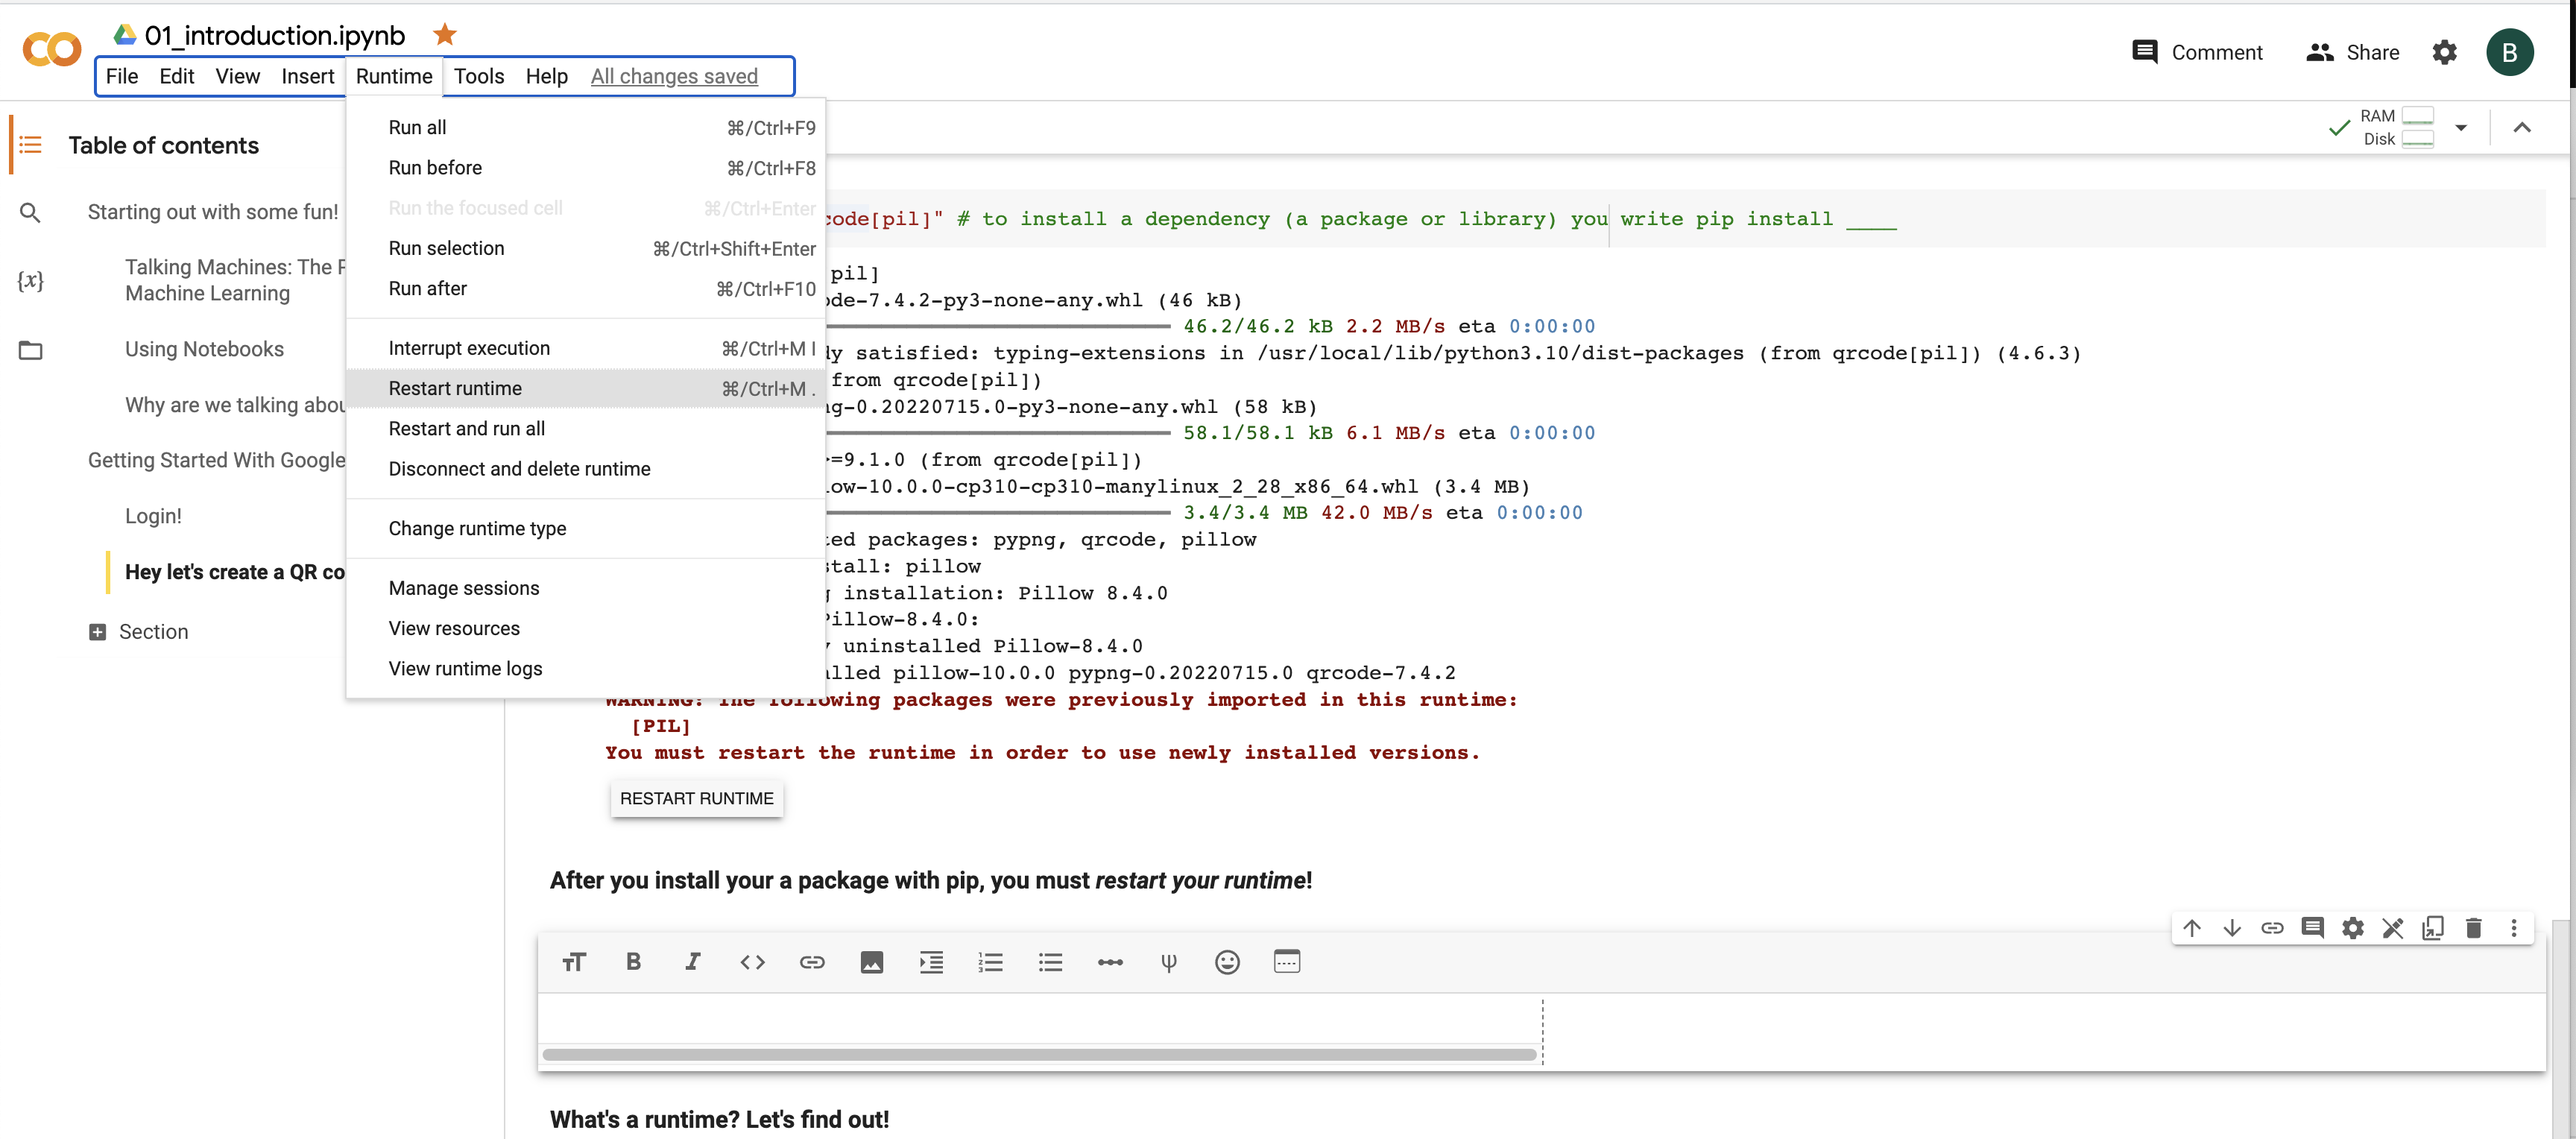

Next, I'm just doing some minor utility work...

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True) # here I'm mounting files from Google that I can access during a coding session.

Mounted at /content/drive


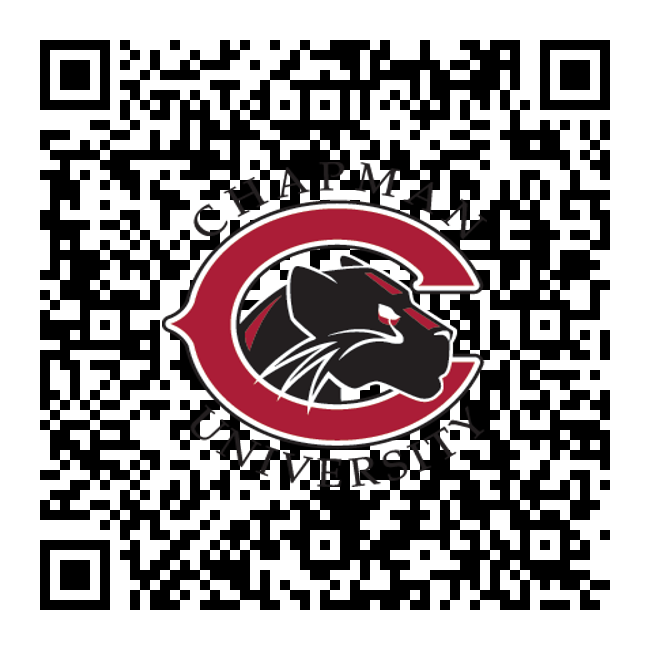

In [ ]:
import qrcode
from PIL import Image

# for more on creating a QR code with python see: https://github.com/lincolnloop/python-qrcode

resources_dir = "/content/drive/My Drive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/class_one/"
url = 'https://colab.research.google.com/drive/1-hrINQDwyodrn32tYb7C_t08IQ7TCNEb?authuser=2#scrollTo=I_DWdc_VfSUv'

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H, # high error correction
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)

img_qr = qr.make_image(fill='black', back_color='white').convert("RGB") # Convert QR code to RGB mode

# here I am embedding a chapman image over the QR code
logo = Image.open(resources_dir + "chapman-athletics-logo.png")

# in order to use the photo, I have to manpulate its dimensions
logo_width = min(img_qr.size) // 2
logo_height = logo_width
logo = logo.resize((logo_width, logo_height))

logo_box = ((img_qr.size[0] - logo_width) // 2,
            (img_qr.size[1] - logo_height) // 2,
            (img_qr.size[0] + logo_width) // 2,
            (img_qr.size[1] + logo_height) // 2)

# here we combine the QR code with the logo
img_qr.paste(logo, logo_box, logo)

# finally I save the QR code
img_qr.save(resources_dir + "class_one_QR_code.png")

img_qr

### If There's Time
**What's a runtime? Let's find out...through the magic of code!** 🤓

In [ ]:
! pip install python-dotenv

In [ ]:
from os import environ
from google.colab import drive
from dotenv import load_dotenv

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
with open("/content/drive/My Drive/Work/Chapman/MGSC_310/Private/mgsc_310_vars.sh") as f:
  lines = f.readlines()[0]
api_key = lines.split("=")[1]

## Let's ask ChatGPT!

In [ ]:
! pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
assert len(api_key) > 0

In [ ]:
import openai
openai.api_key = api_key

In [ ]:
prompt = """
In the context of a notebook, what is a 'runtime'? Please explain it to me like
I'm super smart. Then explain it to me like I've just woken up from a nap and
I'm groggy. Be concise in your answer.
"""

response = openai.Completion.create(
  engine="text-davinci-003",
  prompt=prompt,
  max_tokens=500
)

print(response.choices[0].text.strip())


Super Smart: A runtime is a component of a notebook that allows for the processing and execution of code running on the notebook. 

Groggy: A runtime is like the brain of a notebook - it allows the computer to think and do stuff.


**Gee, thanks GPT!**